Usaremos o dataset **Ames Housing** para construir um modelo de regressão.

**Objetivo:** Prever o preço final de venda (`SalePrice`) de cada casa, com base em suas características.

## 1. Setup Inicial

Primeiro, vamos importar todas as bibliotecas que precisaremos ao longo do exercício.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sns.set(style="whitegrid")

## 2. Obtenção dos Dados

Vamos carregar o dataset Ames Housing diretamente do OpenML.

In [72]:
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame
print("Dados carregados com sucesso!")

Dados carregados com sucesso!


## 3. Exploração dos Dados

### **Exercício 1: Explorar o conteúdo do DataFrame**

Use os métodos do Pandas para visualizar as primeiras linhas, obter um resumo das colunas (tipos de dados e valores nulos) e gerar estatísticas descritivas.

In [73]:
print("As 5 primeiras linhas (head):")
print(df.head()) # SEU CÓDIGO AQUI

print("\nResumo dos dados (info):")
df.info() # SEU CÓDIGO AQUI

print("\nEstatísticas Descritivas (describe):")
print(df.describe()) # SEU CÓDIGO AQUI

# Categorias de cada atributo categórico
print("\nCategorias de cada atributo categórico:")
for col in df.select_dtypes(include=['object', 'category']):
    print(f"{col}: {df[col].unique()}")

As 5 primeiras linhas (head):
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sal

### **Exercício 2: Gerar os histogramas**

Visualize a distribuição dos atributos numéricos.
Use o parâmetro `figsize=(20,15)` do método `hist` para melhorar a visualização. É possível identificar fortes assimetrias e valores truncados?


Histogramas dos atributos numéricos:


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

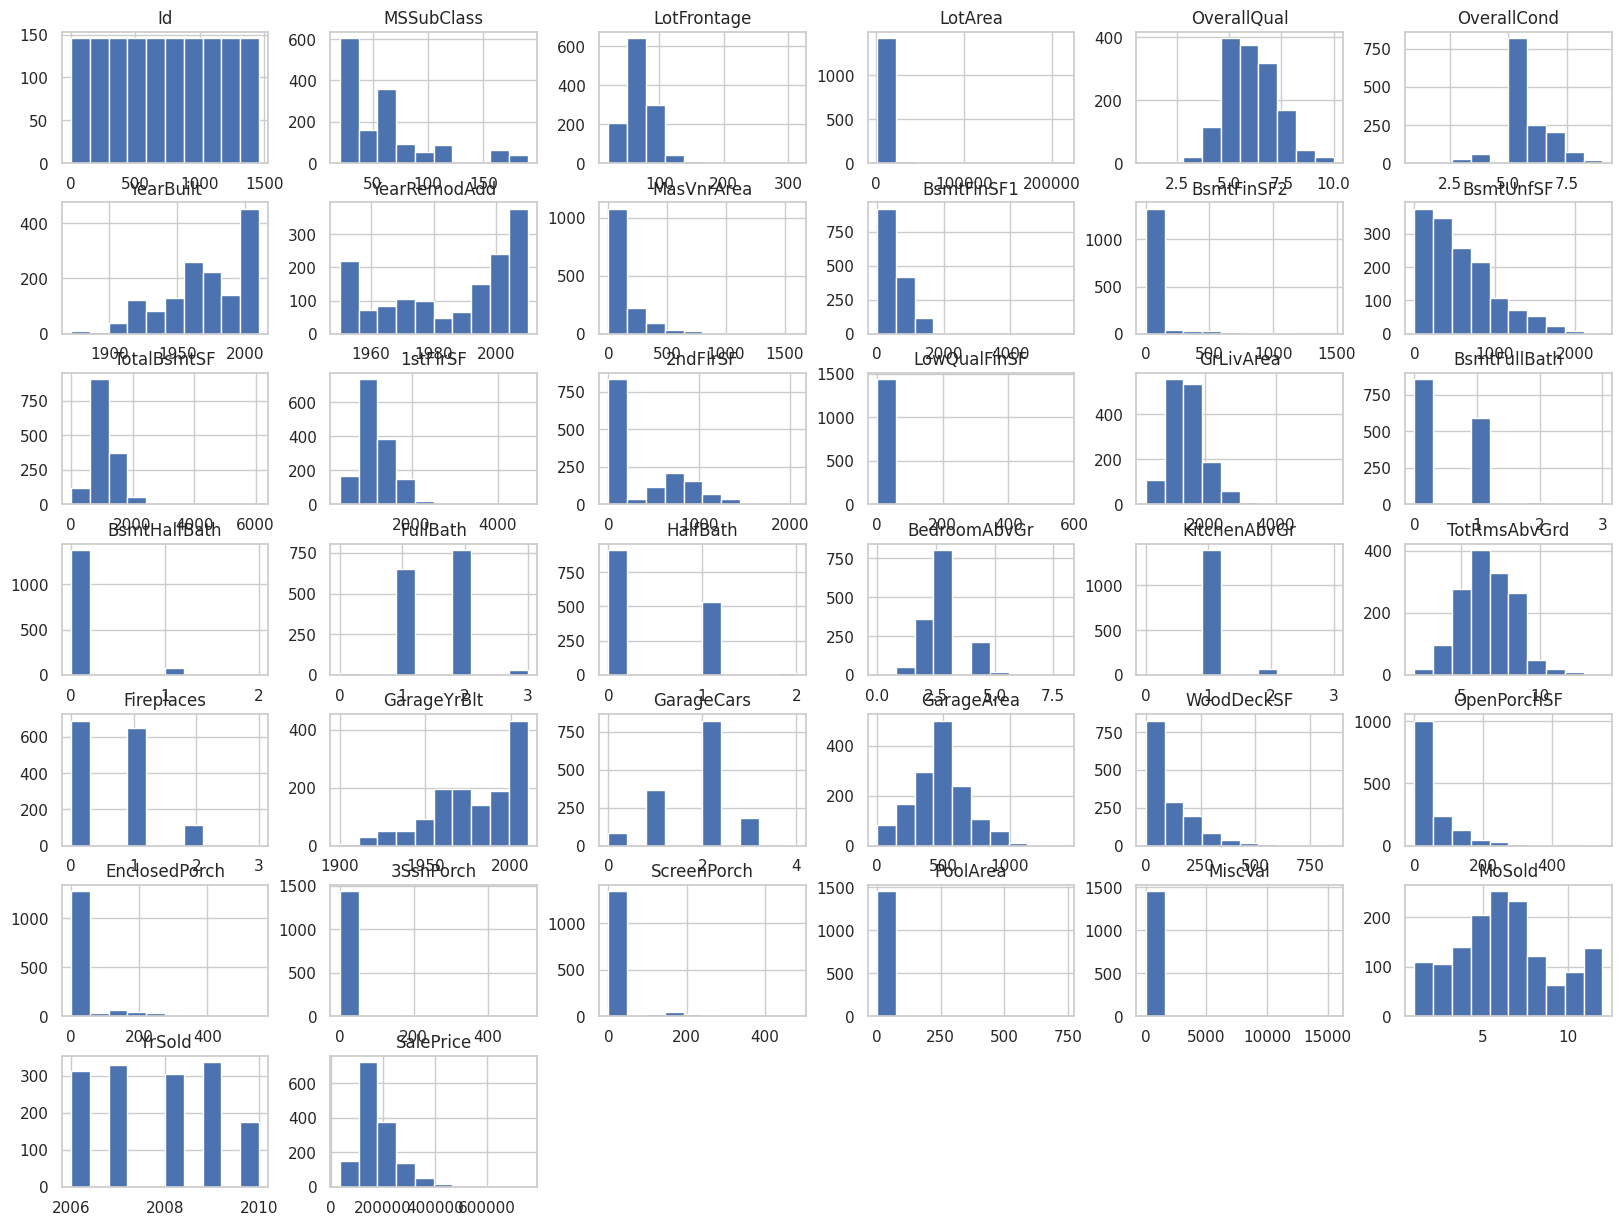

In [74]:
print("\nHistogramas dos atributos numéricos:")
df.hist(figsize=(20, 15))


### **Exercício 3: Listar os atributos mais correlacionados com o target**

Calcule a correlação de Pearson de todos os atributos em relação ao atributo alvo (`SalePrice`) e exiba os atributos em ordem decrescente de correlação.
Lembre de usar o parâmetro `numeric_only=True` no método `corr`, para evitar o erro provocado ao tentar calcular correlação envolvendo atributos categóricos.

In [75]:
# SEU CÓDIGO AQUI
target_name = 'SalePrice' # Define o nome do atributo alvo

print(f"\nCorrelação de Pearson com o target ({target_name}):")

# 1. Calcular a matriz de correlação (apenas para atributos numéricos)
# Usa o parâmetro numeric_only=True conforme solicitado
correlation_matrix = df.corr(numeric_only=True)

# 2. Selecionar a coluna de correlação com o atributo alvo (SalePrice)
target_correlation = correlation_matrix[target_name]

# 3. Filtrar o próprio alvo (que tem correlação 1.0) e obter a ordem decrescente
# O .sort_values(ascending=False) coloca o maior valor de correlação no topo
sorted_correlations = target_correlation.drop(target_name).sort_values(ascending=False)

# 4. Exibir o resultado
print(sorted_correlations)# SEU CÓDIGO AQUI



Correlação de Pearson com o target (SalePrice):
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr   

Faça o scatter plot do atributo de maior correlação (em módulo) e do atributo `SalePrice`.
Faça também um scatter plot para o segundo atributo de maior correlação (em módulo) e o atributo `SalePrice`. É possível observar uma relação aproximadamente linear?

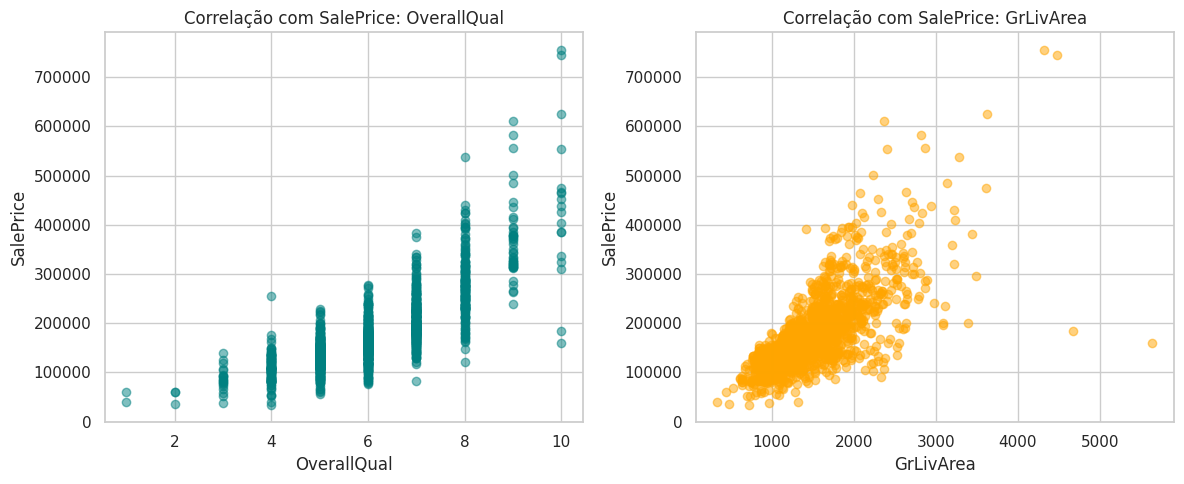

In [76]:
import matplotlib.pyplot as plt

# 5. Selecionar os dois atributos com maior correlação (em módulo)
top1_feature = sorted_correlations.index[0]
top2_feature = sorted_correlations.index[1]

# 6. Gerar os scatter plots
plt.figure(figsize=(12, 5))

# Scatter plot do atributo mais correlacionado
plt.subplot(1, 2, 1)
plt.scatter(df[top1_feature], df[target_name], alpha=0.5, color='teal')
plt.xlabel(top1_feature)
plt.ylabel(target_name)
plt.title(f"Correlação com {target_name}: {top1_feature}")

# Scatter plot do segundo atributo mais correlacionado
plt.subplot(1, 2, 2)
plt.scatter(df[top2_feature], df[target_name], alpha=0.5, color='orange')
plt.xlabel(top2_feature)
plt.ylabel(target_name)
plt.title(f"Correlação com {target_name}: {top2_feature}")

plt.tight_layout()
plt.show()


## 4. Preparação dos Dados

### **Exercício 4: Separar os conjuntos de treino e teste**

Para melhorar a eficiência dos experimentos, vamos usar apenas os atributos `OverallQual`, `GrLivArea`, `Neighborhood` e `GarageCars` (código fornecido abaixo).

Para garantir que a distribuição de preços seja semelhante nos conjuntos de treino e teste, vamos criar uma categoria de preços para usar na amostragem estratificada (código fornecido abaixo).

Em seguida, faça a divisão das instâncias em `train_set` e `test_set` usando a função `train_test_split`, deixando 20% das instâncias no conjunto de teste, e usando `random_state=42`.

Vamos chamar as features do conjunto de treino de `housing_features`, e seus rótulos de `housing_labels` (código fornecido abaixo).

In [77]:
# Seleciona apenas os atributos relevantes
df = df[["OverallQual", "GrLivArea", "Neighborhood", "GarageCars", "SalePrice"]].copy()

# Cria a coluna de categoria de preço para estratificação
df["price_cat"] = pd.cut(df["SalePrice"],
                         bins=[0., 100000, 150000, 200000, 300000, np.inf],
                         labels=[1, 2, 3, 4, 5])


train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["price_cat"])

# Remove a coluna auxiliar
for set_ in (train_set, test_set):
    set_.drop("price_cat", axis=1, inplace=True)

# Define features e rótulos
housing_features = train_set.drop("SalePrice", axis=1)
housing_labels = train_set["SalePrice"].copy()


### **Exercício 5: Criar um Pipeline de Pré-processamento Completo**

Crie um `ColumnTransformer` (chamado `preprocessor`) que:
- Preencha os valores faltantes dos atributos numéricos com a mediana e os padronize.
- Preencha os valores faltantes dos atributos categóricos com o valor mais frequente (`SimpleImputer(strategy='most_frequent')`) e aplique One-Hot encoding.

Em seguida, aplicamos esta transformação nas features (`housing_features`), e armazenamos o resultado em `housing_prepared` (código fornecido abaixo).

In [78]:
# Identifica os tipos de atributos
num_attribs = ["OverallQual", "GrLivArea", "GarageCars"]
cat_attribs = ["Neighborhood"]

# Pipeline para atributos numéricos
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para atributos categóricos
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer combinando os dois pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# Aplica a transformação
housing_prepared = preprocessor.fit_transform(housing_features)


## 5. Seleção e Treinamento de Modelos

### **Exercício 6: Treinar e avaliar modelos de base**

Treine os modelos `LinearRegression`, `DecisionTreeRegressor` e `RandomForestRegressor` com parâmetros default e `random_state=42` e imprima o RMSE de cada um no conjunto de treino.

In [79]:


# Treinamento dos modelos
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)

lin_reg.fit(housing_prepared, housing_labels)
tree_reg.fit(housing_prepared, housing_labels)
forest_reg.fit(housing_prepared, housing_labels)

# Previsões no conjunto de treino
lin_preds = lin_reg.predict(housing_prepared)
tree_preds = tree_reg.predict(housing_prepared)
forest_preds = forest_reg.predict(housing_prepared)

# Cálculo do RMSE
lin_rmse = np.sqrt(mean_squared_error(housing_labels, lin_preds))
tree_rmse = np.sqrt(mean_squared_error(housing_labels, tree_preds))
forest_rmse = np.sqrt(mean_squared_error(housing_labels, forest_preds))

# Exibição dos resultados
print(f"Linear Regression RMSE: {lin_rmse:.2f}")
print(f"Decision Tree RMSE: {tree_rmse:.2f}")
print(f"Random Forest RMSE: {forest_rmse:.2f}")


Linear Regression RMSE: 35254.91
Decision Tree RMSE: 2465.67
Random Forest RMSE: 13196.16


### **Exercício 7: Validação cruzada para o RandomForestRegressor**

Avalie o `RandomForestRegressor` (com parâmetros default, e `random_state=42`) usando validação cruzada com 10 folds para ter uma estimativa mais robusta de seu desempenho. Qual a média e desvio padrão do RMSE?

In [80]:
# Modelo com parâmetros padrão
forest_reg = RandomForestRegressor(random_state=42)

# Validação cruzada com scoring negativo do MSE
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

# Converte para RMSE
rmse_scores = np.sqrt(-scores)

# Exibe os resultados
print("RMSE por fold:", rmse_scores)
print(f"Média do RMSE: {rmse_scores.mean():.2f}")
print(f"Desvio padrão do RMSE: {rmse_scores.std():.2f}")


RMSE por fold: [35480.79669454 31793.8360906  34002.17498559 26642.53198639
 31021.77910471 36676.36066141 32218.38285276 40534.07772505
 46470.13928305 33203.69695214]
Média do RMSE: 34804.38
Desvio padrão do RMSE: 5222.66


## 6. Ajuste Fino e Avaliação Final

### **Exercício 8: Otimização com GridSearchCV**

Use `GridSearchCV` para encontrar os melhores hiperparâmetros para o `RandomForestRegressor`. Teste os valores 20, 30 e 50 para o parâmetro `n_estimators`. Use 5 folds na validação cruzada.

Qual o melhor RMSE encontrado? Para qual valor do parâmetro `n_estimators`?

In [81]:

# Define o modelo base
forest_reg = RandomForestRegressor(random_state=42)

# Define os hiperparâmetros a testar
param_grid = {
    "n_estimators": [20, 30, 50]
}

# Configura o GridSearchCV
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

# Executa a busca
grid_search.fit(housing_prepared, housing_labels)

# Extrai o melhor modelo e RMSE
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

# Exibe os resultados
print(f"Melhor RMSE: {best_rmse:.2f}")
print(f"Melhor valor de n_estimators: {best_params['n_estimators']}")


Melhor RMSE: 35381.42
Melhor valor de n_estimators: 30


### **Exercício 9: Avaliar o melhor modelo no conjunto de teste**

Finalmente, avalie no conjunto de teste o desempenho do melhor modelo obtido na otimização de hiparparâmetros. Lembre de aplicar o pré-processamento nos atributos do conjunto de teste.

Qual RMSE obtido?

In [82]:


# Aplica o pré-processamento nas features do conjunto de teste
X_test_prepared = preprocessor.transform(test_set.drop("SalePrice", axis=1))
y_test = test_set["SalePrice"].copy()

# Faz previsões com o melhor modelo encontrado no GridSearchCV
final_predictions = best_model.predict(X_test_prepared)

# Calcula o RMSE no conjunto de teste
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

# Exibe o resultado
print(f"RMSE no conjunto de teste: {final_rmse:.2f}")


RMSE no conjunto de teste: 33369.64
